# Exploratory Data Analysis (EDA)

In [51]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

# Display the first few rows of the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
# Summary statistics of numerical variables
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Figure size 1400x1000 with 0 Axes>

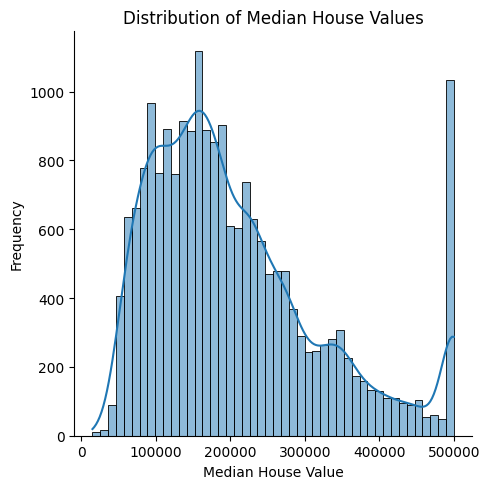

In [53]:
# Plot distribution of house prices (the target variable)
plt.figure(figsize=(14, 10))
sns.displot(housing['median_house_value'], kde=True)

plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

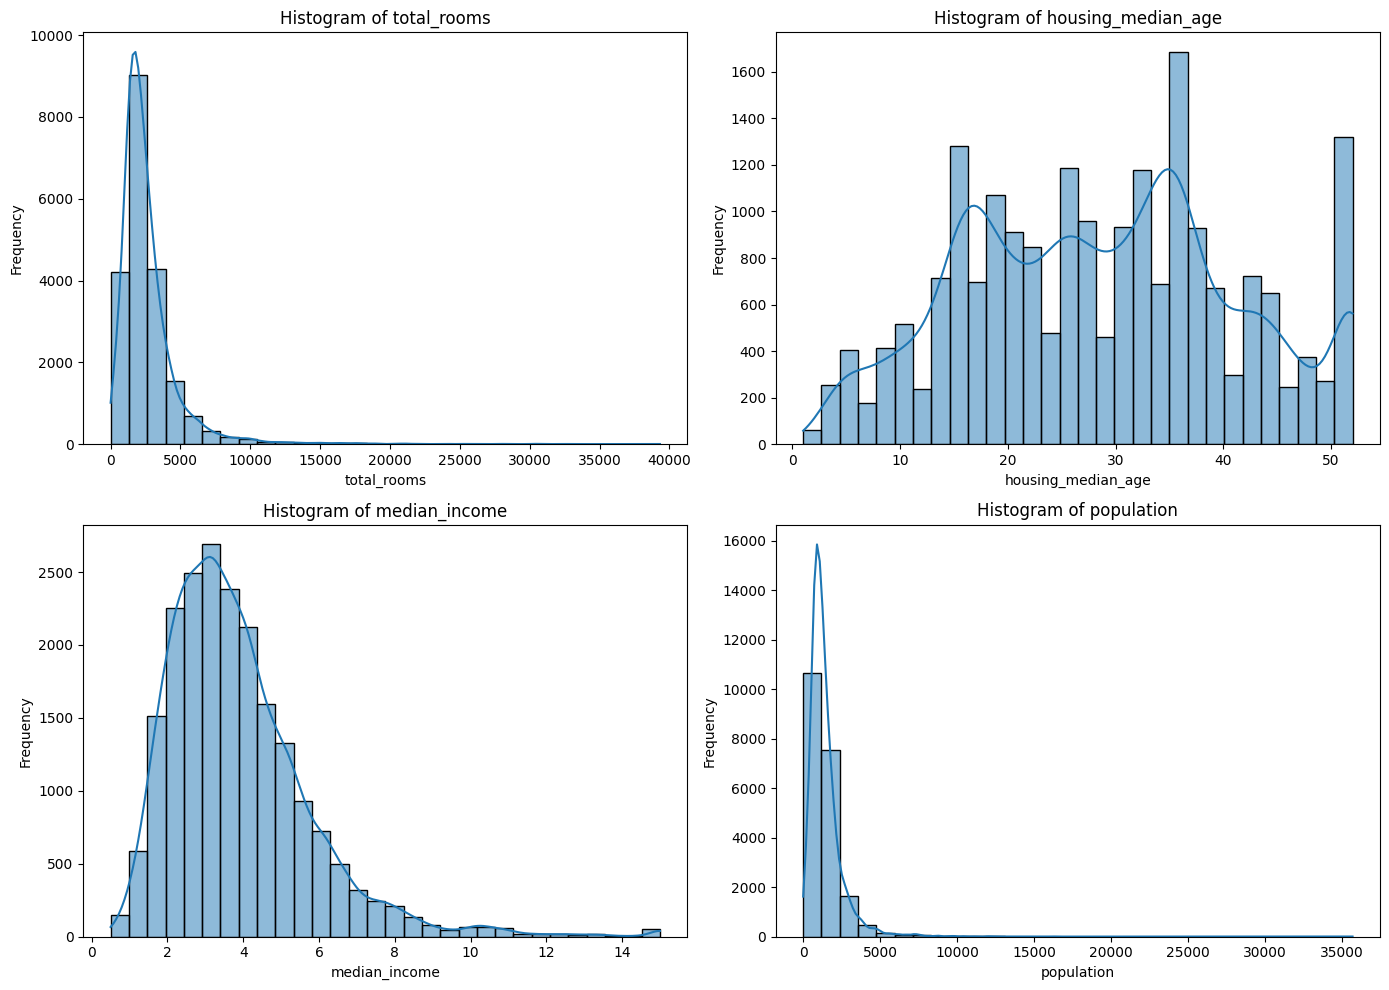

In [54]:
# Create histograms for selected numerical variables (Rooms, Median Age, Median Income, Population)
selected_columns = ['total_rooms', 'housing_median_age', 'median_income', 'population']

plt.figure(figsize=(14, 10))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(housing[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

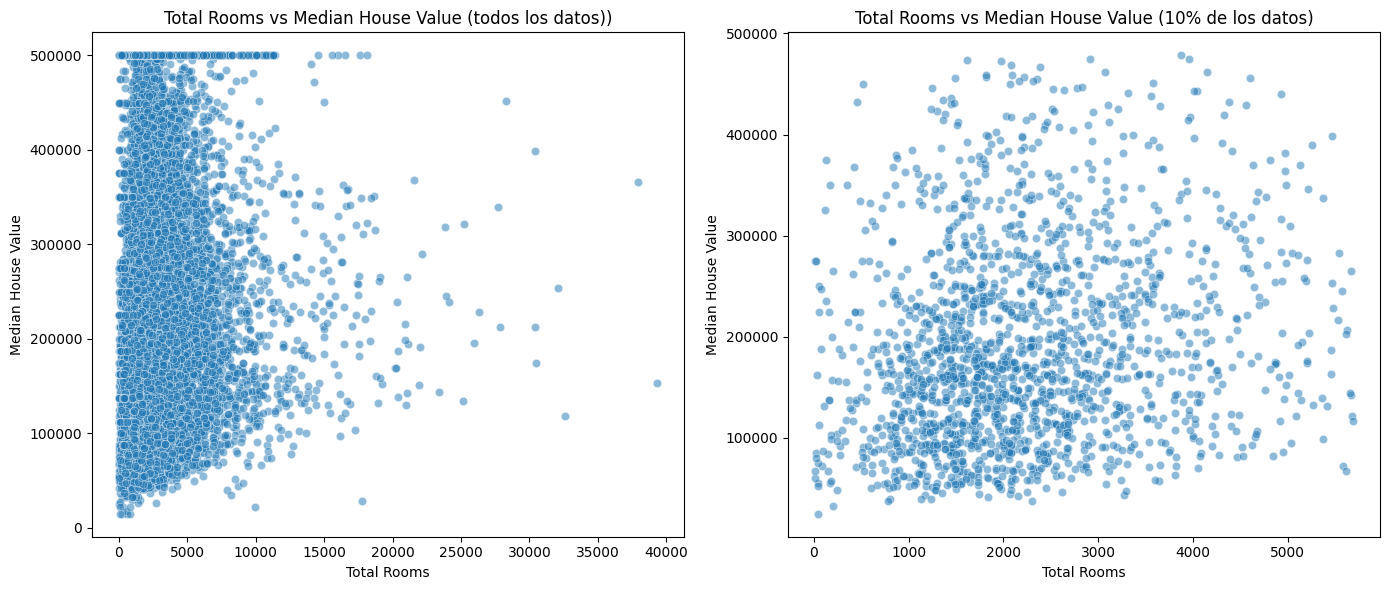

In [55]:
# Scatter plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x='total_rooms', y='median_house_value', data=housing, ax=ax[0], alpha=0.5)
ax[0].set_title('Total Rooms vs Median House Value (todos los datos))')
ax[0].set_xlabel('Total Rooms')
ax[0].set_ylabel('Median House Value')

# Calcula el IQR para 'total_rooms'
Q1_rooms = housing['total_rooms'].quantile(0.25)
Q3_rooms = housing['total_rooms'].quantile(0.75)
IQR_rooms = Q3_rooms - Q1_rooms

# Calcula el IQR para 'median_house_value'
Q1_value = housing['median_house_value'].quantile(0.25)
Q3_value = housing['median_house_value'].quantile(0.75)
IQR_value = Q3_value - Q1_value


# Define los límites para considerar outliers
lower_bound_rooms = Q1_rooms - 1.5 * IQR_rooms
upper_bound_rooms = Q3_rooms + 1.5 * IQR_rooms

lower_bound_value = Q1_value - 1.5 * IQR_value
upper_bound_value = Q3_value + 1.5 * IQR_value

# Filtra el DataFrame para eliminar outliers
housing_filtered = housing[
    (housing['total_rooms'] >= lower_bound_rooms) &
    (housing['total_rooms'] <= upper_bound_rooms) &
    (housing['median_house_value'] >= lower_bound_value) &
    (housing['median_house_value'] <= upper_bound_value)
]

# Toma una muestra del 10% de los datos
housing_sample = housing_filtered.sample(frac=0.10, random_state=42)

# Scatter plot (Total Rooms vs Median House Value)
sns.scatterplot(x='total_rooms', y='median_house_value', data=housing_sample, ax=ax[1], alpha=0.5)
ax[1].set_title('Total Rooms vs Median House Value (10% de los datos)')
ax[1].set_xlabel('Total Rooms')
ax[1].set_ylabel('Median House Value')
plt.tight_layout()
plt.show()

<ipython-input-56-4cc2df500c18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ocean_price_means.index, y=ocean_price_means.values, palette="bright", ax=ax[1])


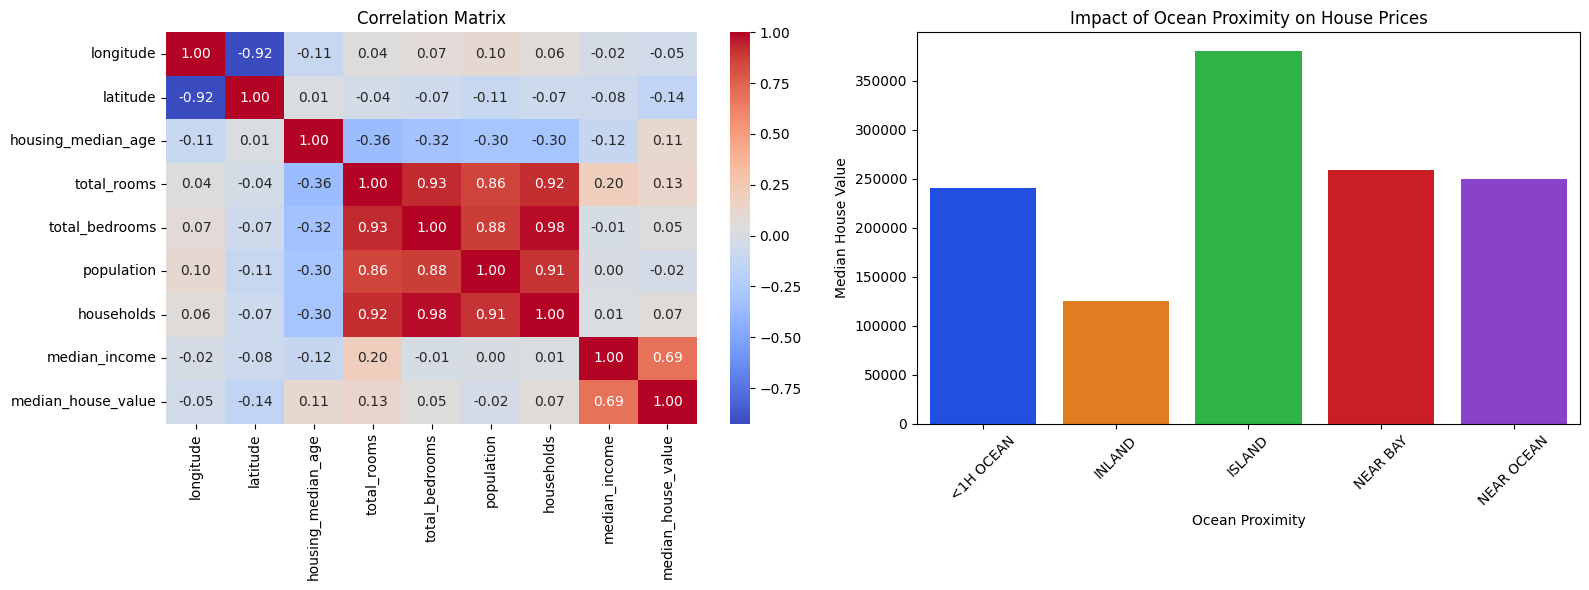

In [56]:
# Correlation matrix to identify influential variables
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
numeric_housing = housing.drop(columns=['ocean_proximity'])
correlation_matrix = numeric_housing.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax[0])
ax[0].set_title('Correlation Matrix')

# Bar chart to visualize the impact of ocean proximity on house prices
ocean_price_means = housing.groupby('ocean_proximity')['median_house_value'].mean()
sns.barplot(x=ocean_price_means.index, y=ocean_price_means.values, palette="bright", ax=ax[1])

ax[1].set_title('Impact of Ocean Proximity on House Prices')
ax[1].set_xlabel('Ocean Proximity')
ax[1].set_ylabel('Median House Value')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Filter Methods

In [57]:
# Load the housing dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

# Display the first few rows of the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [58]:
# Calculate the correlation matrix between numerical variables
numeric_housing = housing.drop(columns=['ocean_proximity'])
correlation_matrix = numeric_housing.corr()

# Extract the correlations between numerical predictors and the target variable (median_house_value)
correlations_with_target = correlation_matrix['median_house_value']

# Sort the correlations in descending order to identify influential variables
sorted_correlations = correlations_with_target.sort_values(ascending=False)

# Display the influential variables
print("Correlations with median_house_value:")
print(sorted_correlations)

Correlations with median_house_value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [59]:
# Set a threshold for the correlation coefficient (you can adjust this value)
correlation_threshold = 0.2

# Select influential variables based on the threshold
influential_variables = correlations_with_target[abs(correlations_with_target) >= correlation_threshold]
influential_variables_sorted = influential_variables.sort_values(ascending=False)

# Display the selected influential variables
print(f"Influential variables with a correlation coefficient above {correlation_threshold}:")
print(influential_variables_sorted)

Influential variables with a correlation coefficient above 0.2:
median_house_value    1.000000
median_income         0.688075
Name: median_house_value, dtype: float64


# Chi-Square Test

In [60]:
# Create a sample dataset (you can replace this with your dataset)
housing['house_value_category'] = pd.cut(housing['median_house_value'],
                                         bins=3, labels=['Low', 'Medium', 'High'])

In [61]:
from scipy.stats import chi2_contingency

# Define a function to perform the chi-square test and return the p-value
def perform_chi_square_test(df, variable):
    contingency_table = pd.crosstab(df[variable], df['house_value_category'])
    print(contingency_table)  # Display the contingency table for clarity
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

# List of categorical variables for testing (add more if needed)
categorical_variables = ['ocean_proximity']

# Perform the chi-square test for each categorical variable
chi_square_results = {}
for variable in categorical_variables:
    p_value = perform_chi_square_test(housing, variable)
    chi_square_results[variable] = p_value

# Display the p-values for each variable
print("\nChi-Square Test Results:")
for variable, p_value in chi_square_results.items():
    print(f"{variable}: p-value = {p_value:.4f}")

house_value_category   Low  Medium  High
ocean_proximity                         
<1H OCEAN             2924    4634  1578
INLAND                5553     861   137
ISLAND                   0       2     3
NEAR BAY               691     998   601
NEAR OCEAN             921    1128   609

Chi-Square Test Results:
ocean_proximity: p-value = 0.0000


In [62]:
# Set a significance level threshold (adjust as needed)
significance_level = 0.05

# Select influential variables based on the significance level
influential_variables = {variable: p_value for variable, p_value in chi_square_results.items() if p_value < significance_level}

# Display the selected influential variables
if influential_variables:
    print("\nSelected Influential Variables (p-value < 0.05):")
    for variable, p_value in influential_variables.items():
        print(f"{variable}: p-value = {p_value:.4f}")
else:
    print("No variables were found to be statistically significant at the 0.05 significance level.")



Selected Influential Variables (p-value < 0.05):
ocean_proximity: p-value = 0.0000


# Forward Selection

In [63]:
# Import necessary libraries
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display the first few rows of the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Initialize an empty list of selected variables
selected_variables = []

# Define the initial best accuracy as 0
best_accuracy = 0

# Specify the maximum number of iterations (number of variables)
max_iterations = X.shape[1]

# Create a function to train and evaluate the model
def train_and_evaluate(X, y, selected_variables):
    X_selected = X[selected_variables]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Perform forward selection
for i in range(max_iterations):
    candidate_variables = [var for var in X.columns if var not in selected_variables]
    variable_accuracies = []

    for var in candidate_variables:
        accuracy = train_and_evaluate(X, y, selected_variables + [var])
        variable_accuracies.append((var, accuracy))
        print(f'Accuracy with {selected_variables + [var]}: {accuracy}')

    # Sort variables by accuracy in descending order
    variable_accuracies.sort(key=lambda x: x[1], reverse=True)

    # Select the best-performing variable from candidates
    best_variable, best_accuracy_candidate = variable_accuracies[0]

    # Check if the best candidate improves model accuracy
    if best_accuracy_candidate > best_accuracy:
        selected_variables.append(best_variable)
        best_accuracy = best_accuracy_candidate
        print(f'Selected variable: {best_variable}, New best accuracy: {best_accuracy}')
    else:
        break

# Display the selected influential variables
print('Selected influential variables:', selected_variables)

Accuracy with ['sepal length (cm)']: 0.8333333333333334
Accuracy with ['sepal width (cm)']: 0.6
Accuracy with ['petal length (cm)']: 1.0
Accuracy with ['petal width (cm)']: 1.0
Selected variable: petal length (cm), New best accuracy: 1.0
Accuracy with ['petal length (cm)', 'sepal length (cm)']: 1.0
Accuracy with ['petal length (cm)', 'sepal width (cm)']: 1.0
Accuracy with ['petal length (cm)', 'petal width (cm)']: 1.0
Selected influential variables: ['petal length (cm)']


In [65]:
# Train the final model using the selected variables
X_final = X[selected_variables]
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

final_model = LogisticRegression(max_iter=50)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)

# Display the final model's accuracy and selected variables
print('Final model accuracy:', final_accuracy)
print('Selected influential variables:', selected_variables)


Final model accuracy: 1.0
Selected influential variables: ['petal length (cm)']


# Backward Elimination

Final model mean squared error: 3288.087749151882
Selected variables: {'s5', 'bp', 'sex', 's3', 's6', 's4', 'age', 's1', 's2'}


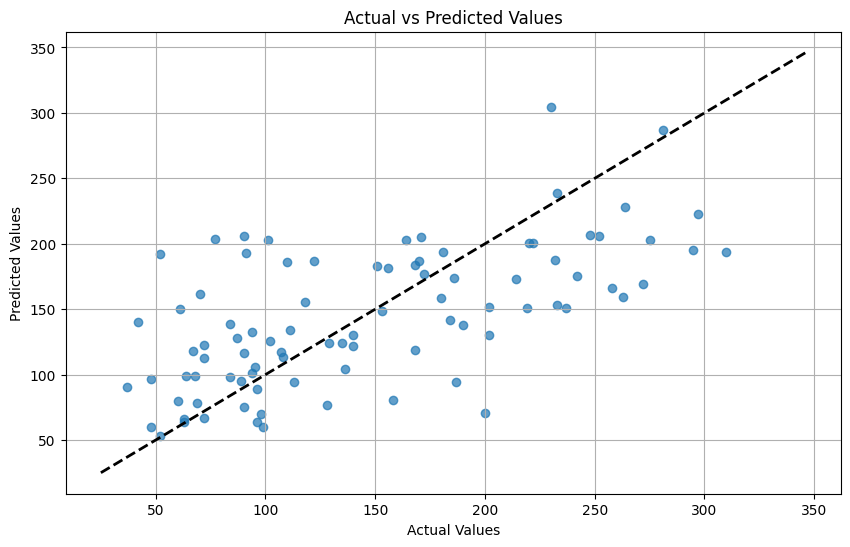

In [66]:
# Import Libraries
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Diabetes dataset
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Split the dataset into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Initialize a set of selected variables with all available variables
selected_variables = set(X.columns)

# Specify the maximum number of iterations (number of variables)
max_iterations = len(selected_variables)

# Define the initial best mean squared error as high
best_mse = float('inf')

# Create a function to train and evaluate the model
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse, model, X_test, y_test

# Perform backward elimination
for i in range(max_iterations):
    variable_mses = []

    for var in selected_variables:
        current_selected = list(selected_variables - {var})
        mse, _, _, _ = train_and_evaluate(X[current_selected], y)
        variable_mses.append((var, mse))

    # Sort variables by MSE in ascending order
    variable_mses.sort(key=lambda x: x[1])

    # Select the variable with the highest MSE
    worst_variable, worst_mse_candidate = variable_mses[-1]

    # Check if removing the worst candidate improves model performance
    if worst_mse_candidate < best_mse:
        selected_variables.remove(worst_variable)
        best_mse = worst_mse_candidate
    else:
        break

# Train the final model using the selected variables
final_mse, final_model, X_test, y_test = train_and_evaluate(X[list(selected_variables)], y)

# Display the final model's mean squared error and selected variables
print('Final model mean squared error:', final_mse)
print('Selected variables:', selected_variables)

# Plot the relationship between actual and predicted values
y_pred_final = final_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


# Stepwise Selection

In [67]:
# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=";")

# Display the first few rows of the dataset
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [68]:
# Import libraries
import statsmodels.api as sm

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=";")

# Split the dataset into features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Initialize an empty list of selected features
selected_features = []

# Create a function to train and evaluate the model
def train_and_evaluate(X, y, selected_features):
    X_with_constant = sm.add_constant(X[selected_features])
    model = sm.OLS(y, X_with_constant).fit()
    y_pred = model.predict(X_with_constant)
    mse = mean_squared_error(y, y_pred)
    return mse, model

# Perform stepwise feature selection
while True:
    candidate_features = [feature for feature in X.columns if feature not in selected_features]
    feature_mses = []

    for feature in candidate_features:
        mse, _ = train_and_evaluate(X, y, selected_features + [feature])
        feature_mses.append((feature, mse))

    # Sort features by MSE in ascending order
    feature_mses.sort(key=lambda x: x[1])

    # Select the best-performing feature from candidates
    best_feature, best_mse_candidate = feature_mses[0]

    # Check if the best candidate improves the model based on AIC
    _, current_model = train_and_evaluate(X, y, selected_features)
    current_aic = current_model.aic
    _, updated_model = train_and_evaluate(X, y, selected_features + [best_feature])
    updated_aic = updated_model.aic

    if updated_aic < current_aic:
        selected_features.append(best_feature)
    else:
        break

# Display the selected influential features
print('Selected influential features:', selected_features)

Selected influential features: ['alcohol', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'fixed acidity']


In [69]:
# Train the final model using the selected features
final_mse, final_model = train_and_evaluate(X, y, selected_features)

# Display the final model's Mean Squared Error and selected features
print('Final model Mean Squared Error:', final_mse)
print('Selected features:', selected_features)

# Display the summary of the final model (including coefficients)
print(final_model.summary())

Final model Mean Squared Error: 0.5632469120616972
Selected features: ['alcohol', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'fixed acidity']
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        03:35:38   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    

# Integrated Feature Selection with Lasso Regression

In [70]:
# Import Libraries
from sklearn.datasets import fetch_california_housing

# Load the California Housing Prices dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the dataset
print(X.head())
print(y[:5])

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
[4.526 3.585 3.521 3.413 3.422]


In [71]:
from sklearn.linear_model import Lasso

# Initialize and fit a Lasso regression model with regularization parameter alpha
alpha = 0.1
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Calculate Mean Squared Error to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Display selected features (with non-zero coefficients) for Lasso
selected_features = X.columns[lasso_model.coef_ != 0]
print('Selected features:', selected_features.tolist())

Mean Squared Error: 0.6135115198058131
Selected features: ['MedInc', 'HouseAge', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [72]:
from sklearn.linear_model import Ridge

# Initialize and fit a Ridge regression model with regularization parameter alpha
alpha = 1.0
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate Mean Squared Error to evaluate model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Mean Squared Error for Ridge Regression:', mse_ridge)

Mean Squared Error for Ridge Regression: 0.5558034669932211
